In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=4, random_state=42)

In [23]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [24]:
df

,Feature_1,Feature_2
0,-2.282534,-9.692815
1,-6.147668,1.755990
2,13.399091,-1.260023
3,-4.077630,3.160226
4,9.444735,0.340868
...,...,...
495,-1.282205,-3.181575
496,-2.817604,10.378894
497,3.296740,8.649256
498,-8.970519,-2.684073


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [26]:
inertia = []
K_range = range(1, 11)

In [27]:

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

c:\Users\nabee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nabee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nabee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nabee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [28]:
inertia

[999.9999999999991,
 528.8064432605648,
 294.4377068678187,
 250.45524696534443,
 216.88110656982602,
 185.27440675195902,
 156.70879996290444,
 135.62603453115247,
 129.10396348239811,
 119.94101297104991]

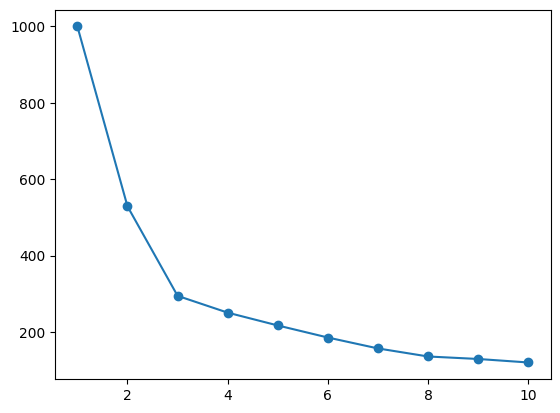

In [29]:
plt.plot(K_range, inertia, marker='o')

In [30]:
kmeans_final = KMeans(n_clusters=3, random_state=42)

In [31]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

c:\Users\nabee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [32]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

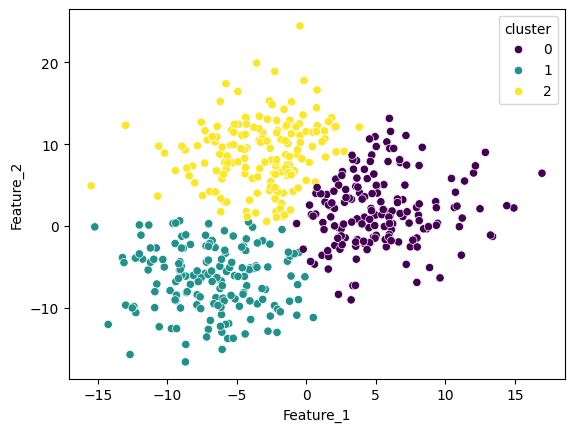

In [33]:

sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')

In [34]:
from sklearn.datasets import make_moons
X,y= make_moons(n_samples=500,noise=0.05,random_state=42)

In [35]:
from sklearn.cluster import KMeans,DBSCAN

In [36]:
df = pd.DataFrame(X,columns=['F1','F2'])

In [37]:
scaler = StandardScaler()

In [38]:
X_scaled = scaler.fit_transform(df)

In [41]:
kmeans_db  = KMeans(n_clusters=2,random_state=42)
kmeans_labels = kmeans_db.fit_predict(X_scaled)

c:\Users\nabee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='F1', ylabel='F2'>

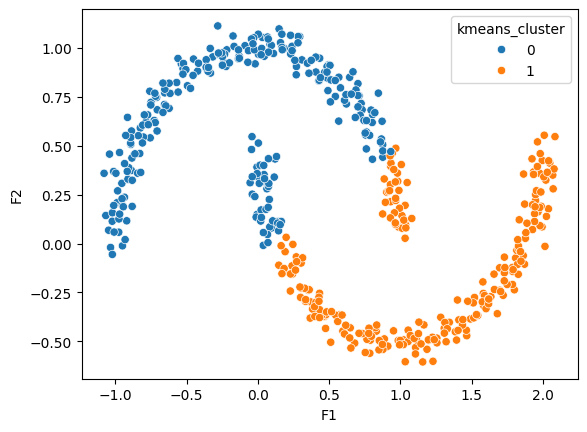

In [42]:
df['kmeans_cluster'] = kmeans_labels
sns.scatterplot(x=df['F1'],y=df['F2'],hue=df['kmeans_cluster'],palette='tab10')

In [43]:
dbscan = DBSCAN(eps=0.3,min_samples=5)
dbsacn_labels = dbscan.fit_predict(X_scaled)

In [44]:
df['dbsanc_cluster'] = dbsacn_labels

<Axes: xlabel='F1', ylabel='F2'>

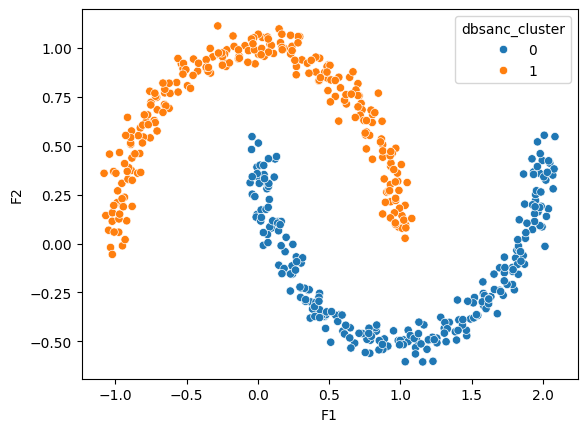

In [45]:
sns.scatterplot(x=df['F1'],y=df['F2'],hue=df['dbsanc_cluster'],palette='tab10')